In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uncomment if necessary
#from sklearn.preprocessing import OneHotEncoder
#from category_encoders import TargetEncoder
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from scipy.stats.mstats import winsorize
import seaborn as sns
#from collections import Counter
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
db = pd.read_csv('data/preprocessed.csv')

# Other possible preprocessed datasets
#db2 = pd.read_csv('data/preprocessed_normalized.csv')
#db3 = pd.read_csv('data/preprocessed_standardized.csv'
#db4 = pd.read_csv('data/preprocessed_noCapital.csv')
#db5 = pd.read_csv('data/preprocessed_noCapital_normalized.csv')
#db6 = pd.read_csv('data/preprocessed_noCapital_standardized.csv')

df = pd.DataFrame(db)

# Decision Trees

- Main advantage : Interpretability
- Main disadvantage : Might cause Overfitting

Explanations taken from https://scikit-learn.org/stable/modules/tree.html

Code partially taken from https://www.datacamp.com/tutorial/decision-tree-classification-python

#### Training and Accuracy

In [3]:
# Split target from features
X = df.drop('income', axis=1)
y = df['income']

In [4]:
# Create training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

[Text(0.3874284703813214, 0.9807692307692307, 'x[16] <= 0.5\ngini = 0.5\nsamples = 1640\nvalue = [815, 825]'),
 Text(0.22119273382272975, 0.9423076923076923, 'x[1] <= 7731.5\ngini = 0.296\nsamples = 676\nvalue = [554, 122]'),
 Text(0.1874235318107667, 0.9038461538461539, 'x[3] <= 11.5\ngini = 0.243\nsamples = 644\nvalue = [553, 91]'),
 Text(0.1329356987493203, 0.8653846153846154, 'x[2] <= 2391.5\ngini = 0.109\nsamples = 465\nvalue = [438, 27]'),
 Text(0.10273926046764546, 0.8269230769230769, 'x[23] <= 0.5\ngini = 0.099\nsamples = 461\nvalue = [437, 24]'),
 Text(0.05539695486677542, 0.7884615384615384, 'x[5] <= 62.5\ngini = 0.067\nsamples = 406\nvalue = [392, 14]'),
 Text(0.035481239804241435, 0.75, 'x[36] <= 0.5\ngini = 0.054\nsamples = 399\nvalue = [388, 11]'),
 Text(0.008700380641653072, 0.7115384615384616, 'x[21] <= 0.5\ngini = 0.008\nsamples = 246\nvalue = [245, 1]'),
 Text(0.004350190320826536, 0.6730769230769231, 'gini = 0.0\nsamples = 201\nvalue = [201, 0]'),
 Text(0.01305057096

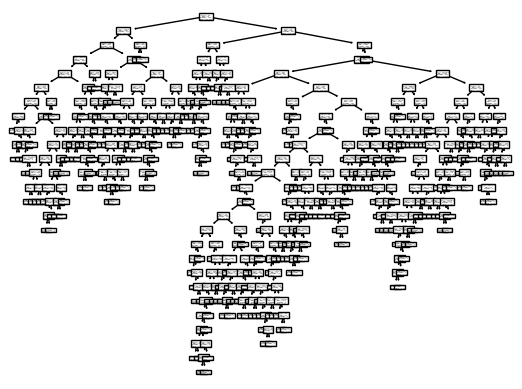

In [5]:
# Train tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [6]:
# Produce predictions using tree
y_pred = clf.predict(X_test)

In [7]:
# Print accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7613636363636364


#### Impact of Hyperparameters on Accuracy

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

Available Hyperparameters:

- splitter (default "best", or "random")
- max_depth (default "None", or an int below like 700)
- min_samples_split (default "2", or an int below 40)
- min_samples_leaf (default "1", or an int below 20)
- min_weight_fraction_leaf (default "0", or a float up to 1)
- max_features (default "None", or "auto"/"sqrt" or "log2" or an int below 13)
- random_state (we should ignore that one and just set it to 42 or something)
- min_impurity_decrease (default "0", I do not really understand it but I think we should leave it alone)
- class_weight (default "None", too complex to change tbh)
- presort (we should ignore this one)

#### Confusion Matrix

- Precision
- Recall
- F1 score
- Accuracy

#### Bias Evaluation

- Demographic parity (?)
- Other fairness metrics

# Random Forest

- Main advantage :
- Main disadvantage :

#### Training and Accuracy

#### Impact of Hyperparameters on Accuracy

#### Confusion Matrix

- Precision
- Recall
- F1 score
- Accuracy

#### Bias Evaluation

- Demographic parity (?)
- Other fairness metrics

# Some neural network algorithm

- Main advantage :
- Main disadvantage :

#### Training and Accuracy

#### Impact of Hyperparameters on Accuracy

#### Confusion Matrix

- Precision
- Recall
- F1 score
- Accuracy

#### Bias Evaluation

- Demographic parity (?)
- Other fairness metrics